In [1]:
import os
import re
import torch
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [2]:
def compute_auc(singular_values):
    d = len(singular_values)
    cumsum = np.cumsum(singular_values)
    numerator = np.sum(cumsum) / d
    denominator = np.sum(singular_values)
    auc = numerator / denominator
    return auc

In [3]:
svd_dir = 'data/resnet18_exp0001/cifar10/svd'
dimension_sizes = []
auc_values = []

for filename in os.listdir(svd_dir):
    if filename.endswith('.pt'):
        data = torch.load(os.path.join(svd_dir, filename))
        singular_values = data['stds'].numpy()
        auc = compute_auc(singular_values)
        match = re.search(r"train_reprs_e0_(\d+)_svd.pt", filename)
        if match:
            dimension_size = int(match.group(1))
            dimension_sizes.append(dimension_size)
            auc_values.append(auc)

# sort
dimension_sizes = np.array(dimension_sizes)
auc_values = np.array(auc_values)
sorted_indices = np.argsort(dimension_sizes)
dimension_sizes = dimension_sizes[sorted_indices]
auc_values = auc_values[sorted_indices]

/tmp/ipykernel_1352816/1923906357.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/tmp/ipykernel_1352816/1923906357.py:15: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(y_min, y_max)


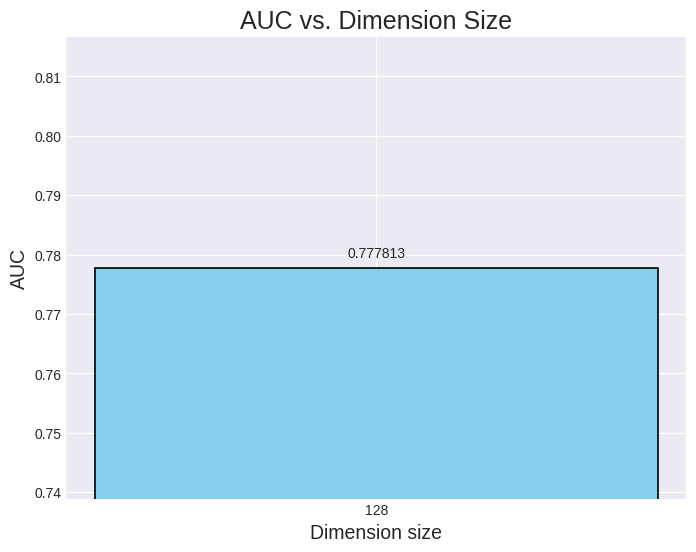

In [4]:
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-darkgrid')

# Create a bar graph of the AUC values
plt.bar(range(len(dimension_sizes)), auc_values, tick_label=dimension_sizes, color='skyblue', edgecolor='black', linewidth=1.2, width=0.6)

# Set the xticks and add annotations
plt.xticks(range(len(dimension_sizes)), dimension_sizes)
for x, y in zip(range(len(dimension_sizes)), auc_values):
    plt.annotate(f'{y:.6f}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# Set the y-axis limits
y_min = min(auc_values) - 0.1 * (max(auc_values) - min(auc_values))
y_max = max(auc_values) + 0.1 * (max(auc_values) - min(auc_values))
plt.ylim(y_min, y_max)

plt.xlabel('Dimension size', fontsize=14)
plt.ylabel('AUC', fontsize=14)
plt.title('AUC vs. Dimension Size', fontsize=18)
plt.show()






In [5]:
table = PrettyTable()
table.field_names = ["Dimension Size", "AUC"]
for dimension_size, auc_value in zip(dimension_sizes, auc_values):
    table.add_row([dimension_size, f"{auc_value:.6f}"])
print(table)


+----------------+----------+
| Dimension Size |   AUC    |
+----------------+----------+
|      128       | 0.777813 |
+----------------+----------+
